In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/_scripts")

import os
from xml.dom import minidom
from dataclasses import dataclass
from itertools import combinations

from shapely import LinearRing, Polygon

import networkx as nx

from helpers.shapely import get_point_as_xy, list_coords
from svg_reader import SVGReader
from adjacency import AdjacencyGenerator
# from cardinal_adjacency import CardinalAdjacency
from classes.domains import Domain, Corners
from classes.directions import Direction

from pprint import pprint


In [2]:
svg_name = "amber_building_a_f01.svg"
sv = SVGReader(svg_name)
sv.run()

In [3]:
ag = AdjacencyGenerator(sv.domains)
ag.run()

bedroom_1 EAST of transit_space
bedroom_1 NORTH of transit_space
bedroom_1 NORTH of bedroom_2
bedroom_1 EAST of laundry
kitchen EAST of dining
kitchen SOUTH of dining
kitchen SOUTH of transit_space
kitchen WEST of bedroom_2
kitchen SOUTH of bedroom_2
m_bath EAST of m_bedroom
m_bath NORTH of bath
m_bath WEST of transit_space
m_bath NORTH of transit_space
m_bath WEST of laundry
m_bedroom EAST of m_closet
m_bedroom NORTH of m_closet
m_bedroom WEST of bath
m_bedroom NORTH of bath
m_bedroom WEST of dining
m_bedroom NORTH of dining
m_closet WEST of dining
m_closet NORTH of dining
m_closet NORTH of closet
bath EAST of dining
bath NORTH of dining
bath WEST of transit_space
bath NORTH of transit_space
bath WEST of laundry
bath SOUTH of laundry
dining WEST of transit_space
dining SOUTH of transit_space
dining EAST of closet
dining NORTH of closet
transit_space WEST of bedroom_2
transit_space NORTH of bedroom_2
transit_space SOUTH of laundry


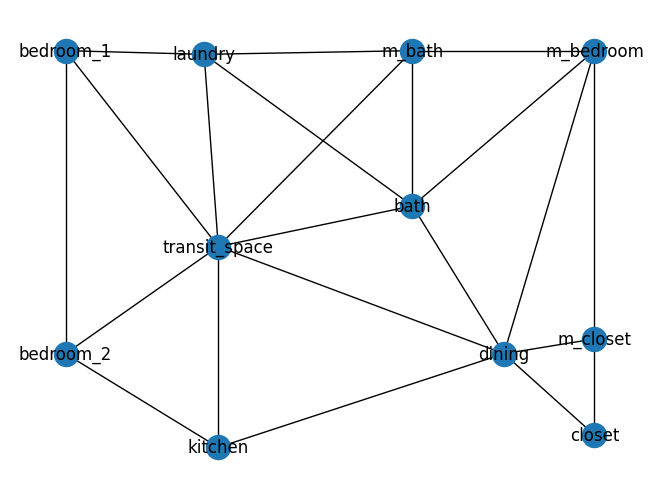

In [4]:
ag.draw_graph()

In [9]:
a = ag.domains["bedroom_1"].corners.y_top

In [17]:
b = ag.domains["laundry"].corners.y_top

In [11]:
import math

In [18]:
print(a,b)
math.isclose(a,b, rel_tol=0.01)

509.0 506.0


True

In [ ]:
math.

In [6]:
from dataclasses import dataclass,field

In [7]:
[d for d in Direction]

[<Direction.NORTH: 0>,
 <Direction.SOUTH: 1>,
 <Direction.EAST: 2>,
 <Direction.WEST: 3>]

In [4]:
pprint(list(ag.G.nodes.data()))

[('bedroom_1',
  {'neighbor_directions': NeighborDirections(NORTH=[],
                                             SOUTH=['transit_space',
                                                    'bedroom_2'],
                                             EAST=[],
                                             WEST=['transit_space',
                                                   'laundry'])}),
 ('kitchen',
  {'neighbor_directions': NeighborDirections(NORTH=['dining',
                                                    'transit_space',
                                                    'bedroom_2'],
                                             SOUTH=[],
                                             EAST=['bedroom_2'],
                                             WEST=['dining'])}),
 ('m_bath',
  {'neighbor_directions': NeighborDirections(NORTH=[],
                                             SOUTH=['bath', 'transit_space'],
                                             EAST=['transit_space',

In [5]:
def check_vertical_relation(a:str, b:str):
    corners_a = ag.domains[a].corners
    corners_b = ag.domains[b].corners

    if corners_a.y_bottom <= corners_b.y_top:
        # a SOUTH of b 
        ag.G.nodes[b]["neighbor_directions"].SOUTH.append(a)
    elif corners_a.y_bottom >= corners_b.y_top:
        # a NORTH of b 
        ag.G.nodes[b]["neighbor_directions"].NORTH.append(a)

In [6]:
def make_horizontal_relation(a:str, b:str):
    corners_a = ag.domains[a].corners
    corners_b = ag.domains[b].corners

    if corners_a.x_left < corners_b.x_right:
        # a EAST of b 
        ag.G.nodes[b]["neighbor_directions"].EAST.append(a)
    elif corners_a.x_left > corners_b.x_right:
        # a WEST of b 
        ag.G.nodes[b]["neighbor_directions"].WEST.append(a)

In [7]:
ag = AdjacencyGenerator(sv.domains)
ag.run()

In [8]:
a,b = ag.pairs[0]
print(ag.G.nodes[a])

{'neighbor_directions': NeighborDirections(NORTH=[], SOUTH=[], EAST=[], WEST=[])}


In [9]:
id(ag.G.nodes[a]["neighbor_directions"])

4500128480

In [10]:
id(ag.G.nodes[b]["neighbor_directions"])

4500128000

In [11]:

check_horizontal_relation(a,b)

EAST


In [12]:
print(a)
ag.G.nodes[a]

bedroom_1


{'neighbor_directions': NeighborDirections(NORTH=[], SOUTH=[], EAST=[], WEST=[])}

In [13]:
print(b)
ag.G.nodes[b]

kitchen


{'neighbor_directions': NeighborDirections(NORTH=[], SOUTH=[], EAST=['bedroom_1'], WEST=[])}

In [11]:
sv.domains

{'bedroom_1': Domain(polygon=<POLYGON ((0 275, 269 275, 269 509, 0 509, 0 275))>, corners=Corners(x_left=0.0, x_right=269.0, y_bottom=275.0, y_top=509.0)),
 'kitchen': Domain(polygon=<POLYGON ((281 0, 431 0, 431 187, 281 187, 281 0))>, corners=Corners(x_left=281.0, x_right=431.0, y_bottom=0.0, y_top=187.0)),
 'm_bath': Domain(polygon=<POLYGON ((443 400, 637 400, 637 509, 443 509, 443 400))>, corners=Corners(x_left=443.0, x_right=637.0, y_bottom=400.0, y_top=509.0)),
 'm_bedroom': Domain(polygon=<POLYGON ((652 280, 830 280, 830 509, 652 509, 652 280))>, corners=Corners(x_left=652.0, x_right=830.0, y_bottom=280.0, y_top=509.0)),
 'm_closet': Domain(polygon=<POLYGON ((746 225, 830 225, 830 275, 746 275, 746 225))>, corners=Corners(x_left=746.0, x_right=830.0, y_bottom=225.0, y_top=275.0)),
 'bath': Domain(polygon=<POLYGON ((443 280, 637 280, 637 383, 443 383, 443 280))>, corners=Corners(x_left=443.0, x_right=637.0, y_bottom=280.0, y_top=383.0)),
 'dining': Domain(polygon=<POLYGON ((453 0,